# MATH 3280 - Project 2

The book one of *Game of Thrones* has 187 different characters. Assume I have never read this book, and that I want to know the most important character of the book. I could do this by simply finding which character is mentioned the most in the book. But just because they are mentioned a lot doesn't necessarily mean they are the most important.

So, let's try to identify the most important character using PageRank. The following dataset looks at the number of characters mentioned in the book ("Source") and any characters mentioned within 15 words ("Target") after the Source character is mentioned, and the number of times this link occurs ("weight").
* [https://raw.githubusercontent.com/drolsonmi/math3280/master/Projects/GameOfThrones1.csv](https://raw.githubusercontent.com/drolsonmi/math3280/master/Projects/GameOfThrones1.csv)

Follow the principles we learned about PageRank in class in order to solve this question. Using Jupyter Notebook, write a paper with your results. Format your paper to look something like the information on this page (You don't need graphs unless they help answer the questions):
* [PageRank: Link Analysis Explanation and Python Implementation from Scratch, *Towards Data Science*](https://towardsdatascience.com/pagerank-3c568a7d2332)

Include information on the following:
* How PageRank works
* How you are going to apply it to answer this question
* Are there any Dead Ends?
* Are there any Spider Traps?
* Conclusion

In [72]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

url = "https://raw.githubusercontent.com/drolsonmi/math3280/master/Projects/GameOfThrones1.csv"
df = pd.read_csv(url)

# Create a list of unique nodes (sources and targets)
unique_sources = df['Source'].unique()
unique_targets = df['Target'].unique()
unique_nodes = np.union1d(unique_sources, unique_targets)

# Create a square transition matrix
transition_matrix = df.pivot_table(index='Source', columns='Target', values='weight', aggfunc='sum', fill_value=0)
transition_matrix = transition_matrix.reindex(index=unique_nodes, columns=unique_nodes, fill_value=0)
N = len(unique_nodes)

# Initialize vectors v and e
v = np.ones((N, 1)) / N  # Reshape to (N, 1)
e = np.ones((N, 1))

beta = 0.8

# Web surfer steps
for i in range(20):
    v = beta * np.dot(transition_matrix, v) + (1 - beta) * (e / N)
#print(v)

In [73]:
# Sorting the Rank nodes
sorted_indices = np.argsort(v[:, 0])[::-1]  # Sort in descending order
sorted_nodes = unique_nodes[sorted_indices]
sorted_pageranks = v[sorted_indices]
sorted_pageranks

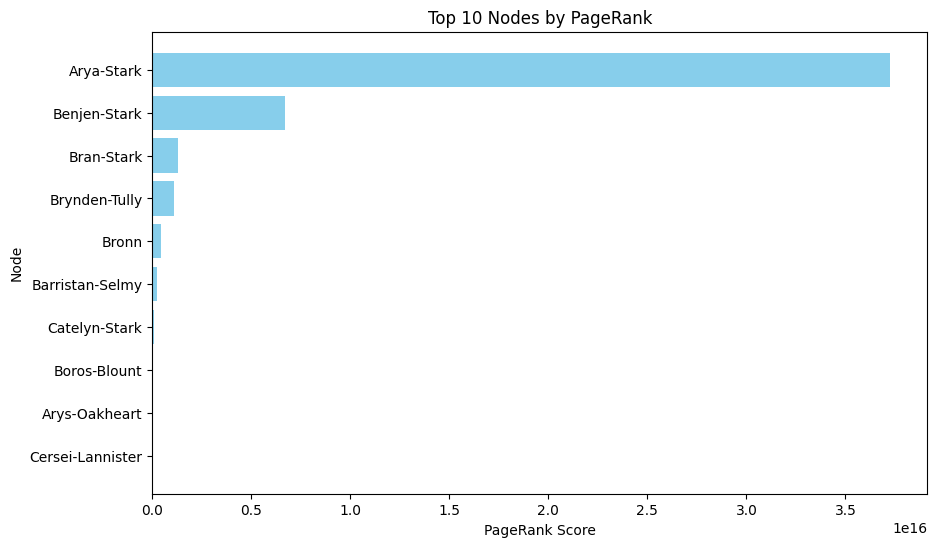

In [74]:
# Display the top N nodes with their PageRank scores
N = 10  # Number of top nodes to display
top_nodes = sorted_nodes[:N]
top_pageranks = sorted_pageranks[:N]

plt.figure(figsize=(10, 6))
plt.barh(top_nodes, top_pageranks[:, 0], color='skyblue')
plt.xlabel('PageRank Score')
plt.ylabel('Node')
plt.title(f'Top {N} Nodes by PageRank')
plt.gca().invert_yaxis()  # Invert the y-axis to display the highest PageRank at the top
plt.show()

In [39]:
# neighbors of the top-ranked node
top_node = top_nodes[0]
neighbors = list(transition_matrix.loc[top_node].index)
print(f'Neighbors of {top_node}: {neighbors}')

Neighbors of Arya-Stark: ['Addam-Marbrand', 'Aegon-I-Targaryen', 'Aemon-Targaryen-(Maester-Aemon)', 'Aerys-II-Targaryen', 'Aggo', 'Albett', 'Alliser-Thorne', 'Alyn', 'Arthur-Dayne', 'Arya-Stark', 'Arys-Oakheart', 'Balon-Greyjoy', 'Balon-Swann', 'Barristan-Selmy', 'Benjen-Stark', 'Beric-Dondarrion', 'Boros-Blount', 'Bowen-Marsh', 'Bran-Stark', 'Brandon-Stark', 'Bronn', 'Brynden-Tully', 'Catelyn-Stark', 'Cayn', 'Cersei-Lannister', 'Chella', 'Chett', 'Chiggen', 'Clement-Piper', 'Clydas', 'Cohollo', 'Colemon', 'Conn', 'Coratt', 'Daenerys-Targaryen', 'Danwell-Frey', 'Dareon', 'Daryn-Hornwood', 'Desmond', 'Dolf', 'Donal-Noye', 'Donnel-Waynwood', 'Doreah', 'Drogo', 'Dywen', 'Eddard-Stark', 'Edmure-Tully', 'Eon-Hunter', 'Eroeh', 'Fogo', 'Galbart-Glover', 'Gared', 'Gendry', 'Gerold-Hightower', 'Gregor-Clegane', 'Grenn', 'Gunthor-son-of-Gurn', 'Haggo', 'Halder', 'Hali', 'Hallis-Mollen', 'Harwin', 'Harys-Swyft', 'Heward', 'High-Septon-(fat_one)', 'Hobb', 'Hodor', 'Hosteen-Frey', 'Hoster-Tully', '

In [91]:
# character with the highest PageRank score
max_pagerank_character = max(G.nodes, key=lambda node: G.nodes[node]['pagerank'])
max_pagerank_score = G.nodes[max_pagerank_character]['pagerank']
print(f"The most important character is '{max_pagerank_character}' with a PageRank score of {max_pagerank_score:.4f}")

The most important character is 'Arya-Stark' with a PageRank score of 37266328399037448.0000


In [8]:
# characters with out-degree of 0 (no outgoing edges)
dead_ends_out = [node for node in G.nodes() if G.out_degree(node) == 0]

# characters with in-degree of 0 (no incoming edges)
dead_ends_in = [node for node in G.nodes() if G.in_degree(node) == 0]

print("Characters with no outgoing edges (dead ends):", dead_ends_out)
print("Characters with no incoming edges:", dead_ends_in)


Characters with no outgoing edges (dead ends): ['Addam-Marbrand', 'Aegon-I-Targaryen', 'Aemon-Targaryen-(Maester-Aemon)', 'Aerys-II-Targaryen', 'Aggo', 'Albett', 'Alliser-Thorne', 'Alyn', 'Arthur-Dayne', 'Arya-Stark', 'Arys-Oakheart', 'Balon-Greyjoy', 'Balon-Swann', 'Barristan-Selmy', 'Benjen-Stark', 'Beric-Dondarrion', 'Boros-Blount', 'Bowen-Marsh', 'Bran-Stark', 'Brandon-Stark', 'Bronn', 'Brynden-Tully', 'Catelyn-Stark', 'Cayn', 'Cersei-Lannister', 'Chella', 'Chett', 'Chiggen', 'Clement-Piper', 'Clydas', 'Cohollo', 'Colemon', 'Conn', 'Coratt', 'Daenerys-Targaryen', 'Danwell-Frey', 'Dareon', 'Daryn-Hornwood', 'Desmond', 'Dolf', 'Donal-Noye', 'Donnel-Waynwood', 'Doreah', 'Drogo', 'Dywen', 'Eddard-Stark', 'Edmure-Tully', 'Eon-Hunter', 'Eroeh', 'Fogo', 'Galbart-Glover', 'Gared', 'Gendry', 'Gerold-Hightower', 'Gregor-Clegane', 'Grenn', 'Gunthor-son-of-Gurn', 'Haggo', 'Halder', 'Hali', 'Hallis-Mollen', 'Harwin', 'Harys-Swyft', 'Heward', 'High-Septon-(fat_one)', 'Hobb', 'Hodor', 'Hosteen-Fr

In [ ]:
# dead ends
for i in range(60):
    v = np.matmul(transition_matrix, v)
    print(v)

In [ ]:
# spider traps
for i in range(30):
    v = np.matmul(transition_matrix, v)
    print(v)